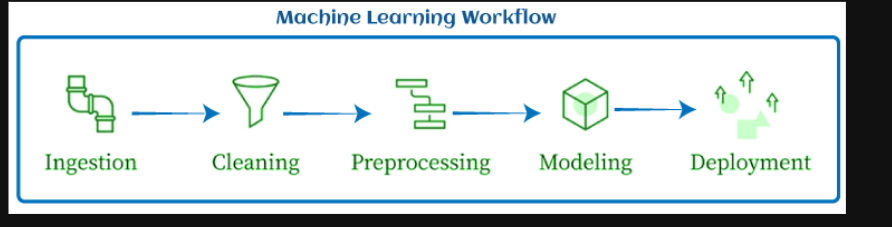

In [1]:
categorical_cols = [i for i in X_train_full.columns if
                    X_train_full[i].nunique() < 10 and
                    X_train_full[i].dtype == "object"]

numerical_cols = [i for i in X_train_full.columns if
                X_train_full[i].dtype in ['int64', 'float64']]


NameError: ignored

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

numerical_transformer = SimpleImputer(strategy='constant')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

In [ ]:
my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_valid)